In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#uploading the file from the local disk

from google.colab import files
uploaded = files.upload()

Saving salary_data.csv to salary_data (1).csv


In [ ]:
#csv file uploaded

import io
salary_data = pd.read_csv(io.BytesIO(uploaded['salary_data.csv']))
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values
# Dataset is now stored in a Pandas Dataframe

'''Python iloc() function enables us to select a particular cell of the dataset, that is, 
it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.''' 

'Python iloc() function enables us to select a particular cell of the dataset, that is, \nit helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.'

In [ ]:
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  81363,  93940,  91738,  98273, 101302, 113812, 109431,
       105582, 116969, 112635, 122391, 121872])

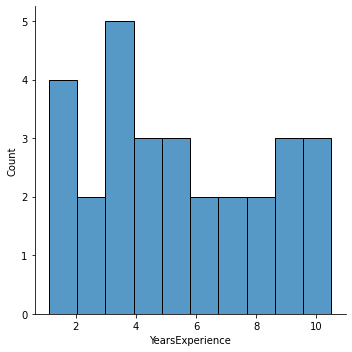

In [ ]:
#visualizing the dataset

sns.displot(salary_data['YearsExperience'],kde=False, bins=10)

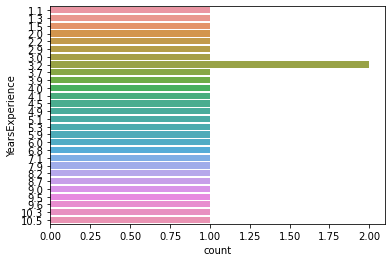

In [ ]:
sns.countplot(y='YearsExperience', data=salary_data)

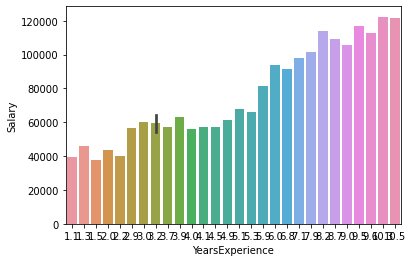

In [ ]:
sns.barplot(x='YearsExperience', y='Salary', data=salary_data)

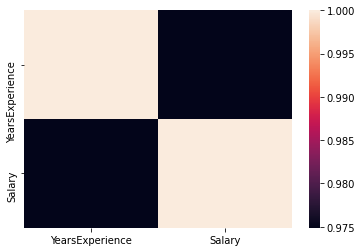

In [ ]:
sns.heatmap(salary_data.corr())

In [ ]:
#Splitting the dataset into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [ ]:
#fitting simple linear regression to the training test 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting the test results

y_pred = lr.predict(x_test)
y_pred

array([ 40896.72365461,  92769.57190421, 107590.38568981,  68685.74950261,
        64054.24519461, 115000.79258261, 122411.19947541, 115927.09344421,
        53864.93571701,  72390.95294901])

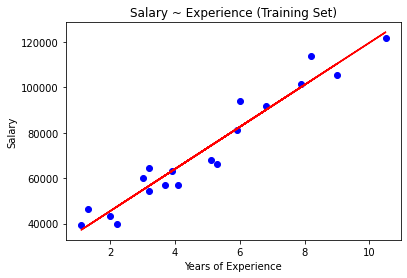

In [ ]:
#Visualizing the training set results

plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color = 'red')
plt.title('Salary ~ Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#calculating the residuals

from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE:  4971.227832682334
MSE:  39626080.20610621
RMSE:  70.50693464250402
